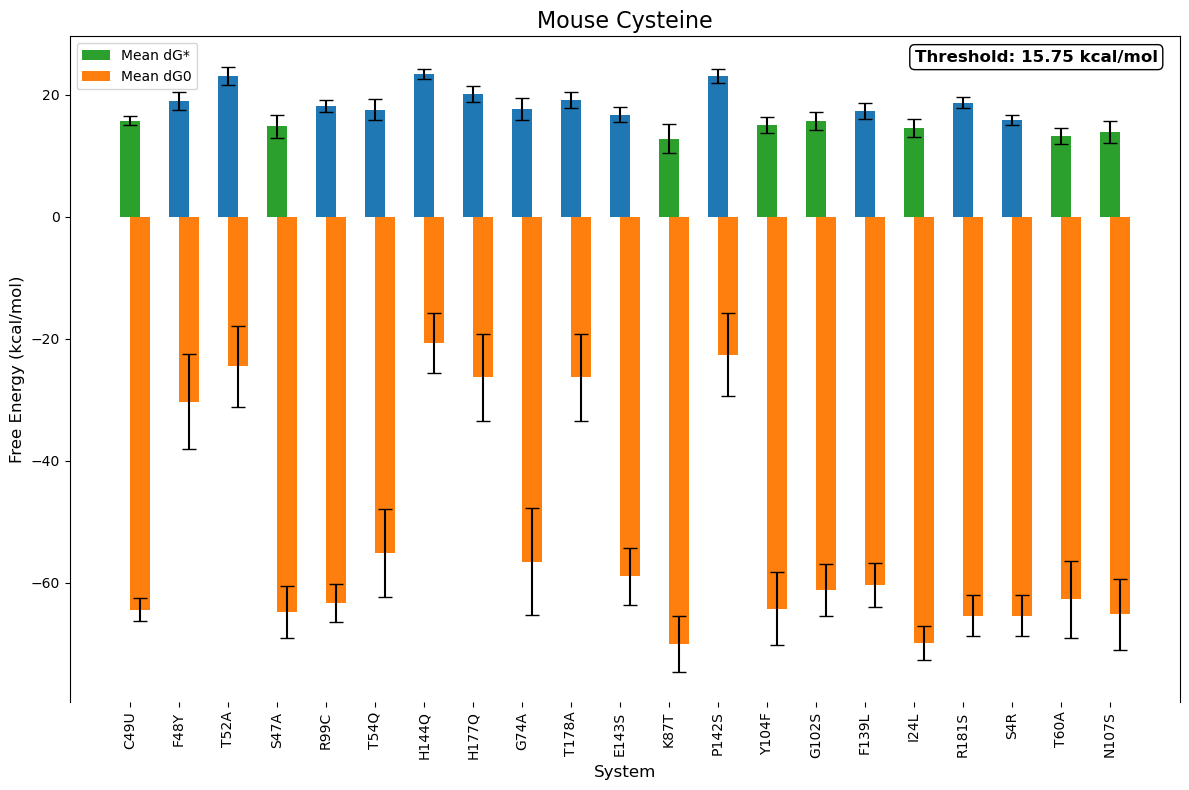

In [ ]:
import re
import matplotlib.pyplot as plt

# Full LaTeX table string with \hline
latex_table = r"""
\documentclass{article}
\usepackage{amsmath}
\usepackage{graphicx}
\begin{document}

\begin{table}[ht]
    \centering
    \begin{tabular}{|c|c|c|}
    \hline
    \textbf{Mutation} & \textbf{Wild Type Energy (kcal/mol)} & \textbf{Mutant Energy (kcal/mol)} \\
    \hline
    C49U & 15.75 $\pm$ 0.71 & -64.42 $\pm$ 1.86 \\
    \hline
    F48Y & 18.92 $\pm$ 1.50 & -30.33 $\pm$ 7.76 \\
    \hline
    T52A & 23.12 $\pm$ 1.48 & -24.54 $\pm$ 6.66 \\
    \hline
    S47A & 14.84 $\pm$ 1.88 & -64.79 $\pm$ 4.23 \\
    \hline
    R99C & 18.14 $\pm$ 0.91 & -63.37 $\pm$ 3.15 \\
    \hline
    T54Q & 17.50 $\pm$ 1.72 & -55.16 $\pm$ 7.16 \\
    \hline
    H144Q & 23.39 $\pm$ 0.87 & -20.72 $\pm$ 4.88 \\
    \hline
    H177Q & 20.14 $\pm$ 1.30 & -26.35 $\pm$ 7.09 \\
    \hline
    G74A & 17.60 $\pm$ 1.82 & -56.58 $\pm$ 8.79 \\
    \hline
    T178A & 19.14 $\pm$ 1.30 & -26.35 $\pm$ 7.09 \\
    \hline
    E143S & 16.72 $\pm$ 1.21 & -58.96 $\pm$ 4.65 \\
    \hline
    K87T & 12.75 $\pm$ 2.37 & -70.05 $\pm$ 4.52 \\
    \hline
    P142S & 23.10 $\pm$ 1.15 & -22.63 $\pm$ 6.78 \\
    \hline
    Y104F & 14.99 $\pm$ 1.32 & -64.24 $\pm$ 6.04 \\
    \hline
    G102S & 15.68 $\pm$ 1.54 & -61.20 $\pm$ 4.27 \\
    \hline
    F139L & 17.34 $\pm$ 1.30 & -60.40 $\pm$ 3.65 \\
    \hline
    I24L & 14.54 $\pm$ 1.50 & -69.94 $\pm$ 2.78 \\
    \hline
    R181S & 18.65 $\pm$ 0.89 & -65.39 $\pm$ 3.38 \\
    \hline
    S4R & 15.85 $\pm$ 0.89 & -65.39 $\pm$ 3.38 \\
    \hline
    T60A & 13.19 $\pm$ 1.30 & -62.71 $\pm$ 6.33 \\
    \hline
    N107S & 13.88 $\pm$ 1.82 & -65.19 $\pm$ 5.84 \\
    \hline
    \end{tabular}
    \caption{Free energy changes in wild type and mutants at 10 \AA\ distance with errors.}
\end{table}

\end{document}
"""

# Remove all LaTeX specific commands like \hline, and unnecessary parts
latex_table_cleaned = re.sub(r'\\hline', '', latex_table)  # Remove \hline from the table

# Regex pattern to extract data
pattern = re.compile(
    r"(?P<system>[A-Za-z0-9\s\+\-]+)\s*&\s*(?P<dg_star>[\d.]+)\s*\$\\pm\$\s*(?P<dg_star_error>[\d.]+)"
    r"\s*&\s*(?P<dg0>[-\d.]+)\s*\$\\pm\$\s*(?P<dg0_error>[\d.]+)\s*",
    re.DOTALL
)

# Find matches in the cleaned LaTeX table
matches = pattern.findall(latex_table_cleaned)

# Extract data for plotting
systems = []
dg_star_values = []
dg_star_errors = []
dg0_values = []
dg0_errors = []

if matches:
    for match in matches:
        system, dg_star, dg_star_error, dg0, dg0_error = match
        systems.append(system.strip())
        dg_star_values.append(float(dg_star))
        dg_star_errors.append(float(dg_star_error))
        dg0_values.append(float(dg0))
        dg0_errors.append(float(dg0_error))

    # Find the threshold value (C49U dG*)
    c49u_index = next((i for i, system in enumerate(systems) if "C49U" in system), None)

    if c49u_index is not None:
        threshold_dg_star = dg_star_values[c49u_index]
    else:
        print("C49U system not found.")
        threshold_dg_star = None  # Handle the case when 'C49U' is not found

    # Proceed with plotting only if C49U is found
    if threshold_dg_star is not None:
        # Color condition for dG* bars based on C49U threshold
        colors = ['#1f77b4' if dg_star > threshold_dg_star else '#2ca02c' for dg_star in dg_star_values]

        # Plot the data as a bar plot with a wider figure
        fig, ax = plt.subplots(figsize=(12, 8))  # A more standard size for publication

        # Bar positions
        x = range(len(systems))

        # Plot Mean dG* values with error bars
        ax.bar(x, dg_star_values, yerr=dg_star_errors, capsize=5, label="Mean dG*", color=colors, width=0.4, align='center')

        # Plot Mean dG0 values with error bars
        ax.bar(x, dg0_values, yerr=dg0_errors, capsize=5, label="Mean dG0", color='#ff7f0e', width=0.4, align='edge')

        # Remove x-axis line (spine)
        ax.spines['bottom'].set_visible(False)

        # Add label for the threshold value in the upper-right corner
        ax.text(0.98, 0.98, f'Threshold: {threshold_dg_star:.2f} kcal/mol', 
                color='black', fontsize=12, ha='right', va='top', fontweight='bold', 
                transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

        # Customizing plot
        ax.set_xticks(x)
        ax.set_xticklabels(systems, rotation=90, ha="center", fontsize=10)
        ax.set_xlabel("System", fontsize=12)
        ax.set_ylabel("Free Energy (kcal/mol)", fontsize=12)
        ax.set_title("Mouse Selenocysteine", fontsize=16)
        ax.legend(loc='upper left', fontsize=10, frameon=True)

        # Adjust layout
        plt.tight_layout()
        plt.show()

else:
    print("No matches found.")


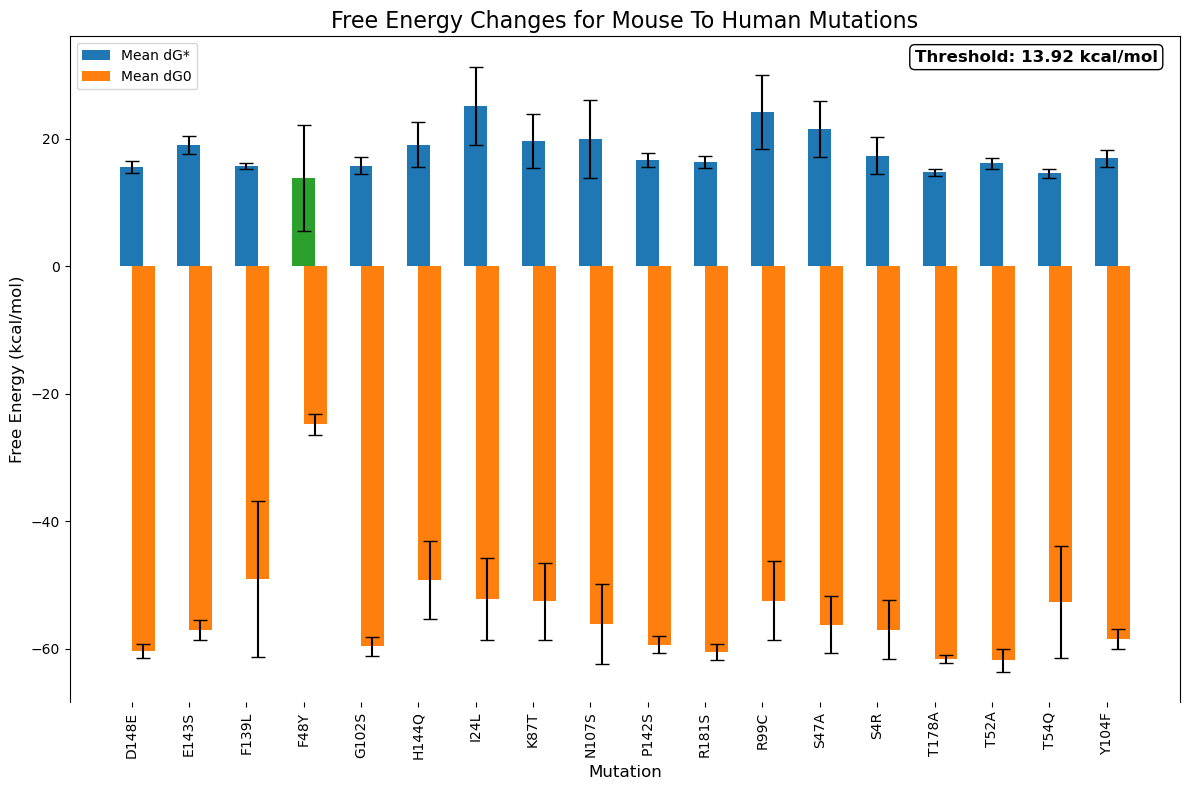

In [1]:
import re
import matplotlib.pyplot as plt

# Updated LaTeX table string
latex_table = r"""
\documentclass{article}
\usepackage{amsmath}
\usepackage{graphicx}
\begin{document}

\begin{table}[ht]
    \centering
    \begin{tabular}{|c|c|c|}
    \hline
    Mutation & Mean dG* & Mean dG0 \\
    \hline
    D148E & 15.68 $\pm$ 0.94 kcal/mol & -60.30 $\pm$ 1.09 kcal/mol \\
    \hline
    E143S & 19.04 $\pm$ 1.40 kcal/mol & -57.10 $\pm$ 1.56 kcal/mol \\
    \hline
    F139L & 15.72 $\pm$ 0.48 kcal/mol & -49.00 $\pm$ 12.27 kcal/mol \\
    \hline
    F48Y & 13.92 $\pm$ 8.33 kcal/mol & -24.79 $\pm$ 1.66 kcal/mol \\
    \hline
    G102S & 15.83 $\pm$ 1.30 kcal/mol & -59.61 $\pm$ 1.52 kcal/mol \\
    \hline
    H144Q & 19.12 $\pm$ 3.53 kcal/mol & -49.19 $\pm$ 6.14 kcal/mol \\
    \hline
    H177Q & nan $\pm$ nan kcal/mol & nan $\pm$ nan kcal/mol \\
    \hline
    I24L & 25.17 $\pm$ 6.19 kcal/mol & -52.16 $\pm$ 6.46 kcal/mol \\
    \hline
    K87T & 19.67 $\pm$ 4.28 kcal/mol & -52.52 $\pm$ 6.01 kcal/mol \\
    \hline
    N107S & 20.05 $\pm$ 6.12 kcal/mol & -56.09 $\pm$ 6.33 kcal/mol \\
    \hline
    P142S & 16.65 $\pm$ 1.09 kcal/mol & -59.32 $\pm$ 1.38 kcal/mol \\
    \hline
    R181S & 16.38 $\pm$ 0.97 kcal/mol & -60.55 $\pm$ 1.26 kcal/mol \\
    \hline
    R99C & 24.29 $\pm$ 5.79 kcal/mol & -52.41 $\pm$ 6.13 kcal/mol \\
    \hline
    S47A & 21.57 $\pm$ 4.46 kcal/mol & -56.18 $\pm$ 4.49 kcal/mol \\
    \hline
    S4R & 17.37 $\pm$ 2.94 kcal/mol & -56.97 $\pm$ 4.69 kcal/mol \\
    \hline
    T178A & 14.77 $\pm$ 0.51 kcal/mol & -61.57 $\pm$ 0.57 kcal/mol \\
    \hline
    T52A & 16.16 $\pm$ 0.89 kcal/mol & -61.77 $\pm$ 1.79 kcal/mol \\
    \hline
    T54Q & 14.62 $\pm$ 0.68 kcal/mol & -52.68 $\pm$ 8.78 kcal/mol \\
    \hline
    T60A & nan $\pm$ nan kcal/mol & nan $\pm$ nan kcal/mol \\
    \hline
    Y104F & 16.94 $\pm$ 1.28 kcal/mol & -58.41 $\pm$ 1.58 kcal/mol \\
    \hline
    \end{tabular}
    \caption{Free Energy Changes for Various Mutations}
\end{table}

\end{document}
"""

# Remove all LaTeX specific commands like \hline, and unnecessary parts
latex_table_cleaned = re.sub(r'\\hline', '', latex_table)  # Remove \hline from the table

# Regex pattern to extract data
pattern = re.compile(
    r"(?P<mutation>[A-Za-z0-9\s\+\-]+)\s*&\s*(?P<dg_star>[\d.]+)\s*\$\\pm\$\s*(?P<dg_star_error>[\d.]+)"
    r"\s*kcal/mol\s*&\s*(?P<dg0>[-\d.]+)\s*\$\\pm\$\s*(?P<dg0_error>[\d.]+)\s*kcal/mol\s*",
    re.DOTALL
)

# Find matches in the cleaned LaTeX table
matches = pattern.findall(latex_table_cleaned)

# Extract data for plotting
mutations = []
dg_star_values = []
dg_star_errors = []
dg0_values = []
dg0_errors = []

if matches:
    for match in matches:
        mutation, dg_star, dg_star_error, dg0, dg0_error = match
        mutations.append(mutation.strip())
        dg_star_values.append(float(dg_star))
        dg_star_errors.append(float(dg_star_error))
        dg0_values.append(float(dg0))
        dg0_errors.append(float(dg0_error))

    # Find the threshold value (F48Y dG*)
    f48y_index = next((i for i, mutation in enumerate(mutations) if "F48Y" in mutation), None)

    if f48y_index is not None:
        threshold_dg_star = dg_star_values[f48y_index]
    else:
        print("F48Y mutation not found.")
        threshold_dg_star = None  # Handle the case when 'F48Y' is not found

    # Proceed with plotting only if F48Y is found
    if threshold_dg_star is not None:
        # Color condition for dG* bars based on F48Y threshold
        colors = ['#1f77b4' if dg_star > threshold_dg_star else '#2ca02c' for dg_star in dg_star_values]

        # Plot the data as a bar plot with a wider figure
        fig, ax = plt.subplots(figsize=(12, 8))  # A more standard size for publication

        # Bar positions
        x = range(len(mutations))

        # Plot Mean dG* values with error bars
        ax.bar(x, dg_star_values, yerr=dg_star_errors, capsize=5, label="Mean dG*", color=colors, width=0.4, align='center')

        # Plot Mean dG0 values with error bars
        ax.bar(x, dg0_values, yerr=dg0_errors, capsize=5, label="Mean dG0", color='#ff7f0e', width=0.4, align='edge')

        # Remove x-axis line (spine)
        ax.spines['bottom'].set_visible(False)

        # Add label for the threshold value in the upper-right corner
        ax.text(0.98, 0.98, f'Threshold: {threshold_dg_star:.2f} kcal/mol', 
                color='black', fontsize=12, ha='right', va='top', fontweight='bold', 
                transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

        # Customizing plot
        ax.set_xticks(x)
        ax.set_xticklabels(mutations, rotation=90, ha="center", fontsize=10)
        ax.set_xlabel("Mutation", fontsize=12)
        ax.set_ylabel("Free Energy (kcal/mol)", fontsize=12)
        ax.set_title("Free Energy Changes for Mouse To Human Mutations", fontsize=16)
        ax.legend(loc='upper left', fontsize=10, frameon=True)

        # Adjust layout
        plt.tight_layout()
        plt.show()

else:
    print("No matches found.")


In [ ]:
import re
import matplotlib.pyplot as plt

# Updated LaTeX table string
latex_table = r"""
\documentclass{article}
\usepackage{amsmath}
\usepackage{graphicx}
\begin{document}

\begin{table}[ht]
    \centering
    \begin{tabular}{|c|c|c|}
    \hline
    Mutation & Mean dG* & Mean dG0 \\
    \hline
    D148E & 15.68 $\pm$ 0.94 kcal/mol & -60.30 $\pm$ 1.09 kcal/mol \\
    \hline
    E143S & 19.04 $\pm$ 1.40 kcal/mol & -57.10 $\pm$ 1.56 kcal/mol \\
    \hline
    F139L & 15.72 $\pm$ 0.48 kcal/mol & -49.00 $\pm$ 12.27 kcal/mol \\
    \hline
    F48Y & 13.92 $\pm$ 8.33 kcal/mol & -24.79 $\pm$ 1.66 kcal/mol \\
    \hline
    G102S & 15.83 $\pm$ 1.30 kcal/mol & -59.61 $\pm$ 1.52 kcal/mol \\
    \hline
    H144Q & 19.12 $\pm$ 3.53 kcal/mol & -49.19 $\pm$ 6.14 kcal/mol \\
    \hline
    H177Q & nan $\pm$ nan kcal/mol & nan $\pm$ nan kcal/mol \\
    \hline
    I24L & 25.17 $\pm$ 6.19 kcal/mol & -52.16 $\pm$ 6.46 kcal/mol \\
    \hline
    K87T & 19.67 $\pm$ 4.28 kcal/mol & -52.52 $\pm$ 6.01 kcal/mol \\
    \hline
    N107S & 20.05 $\pm$ 6.12 kcal/mol & -56.09 $\pm$ 6.33 kcal/mol \\
    \hline
    P142S & 16.65 $\pm$ 1.09 kcal/mol & -59.32 $\pm$ 1.38 kcal/mol \\
    \hline
    R181S & 16.38 $\pm$ 0.97 kcal/mol & -60.55 $\pm$ 1.26 kcal/mol \\
    \hline
    R99C & 24.29 $\pm$ 5.79 kcal/mol & -52.41 $\pm$ 6.13 kcal/mol \\
    \hline
    S47A & 21.57 $\pm$ 4.46 kcal/mol & -56.18 $\pm$ 4.49 kcal/mol \\
    \hline
    S4R & 17.37 $\pm$ 2.94 kcal/mol & -56.97 $\pm$ 4.69 kcal/mol \\
    \hline
    T178A & 14.77 $\pm$ 0.51 kcal/mol & -61.57 $\pm$ 0.57 kcal/mol \\
    \hline
    T52A & 16.16 $\pm$ 0.89 kcal/mol & -61.77 $\pm$ 1.79 kcal/mol \\
    \hline
    T54Q & 14.62 $\pm$ 0.68 kcal/mol & -52.68 $\pm$ 8.78 kcal/mol \\
    \hline
    T60A & nan $\pm$ nan kcal/mol & nan $\pm$ nan kcal/mol \\
    \hline
    Y104F & 16.94 $\pm$ 1.28 kcal/mol & -58.41 $\pm$ 1.58 kcal/mol \\
    \hline
    \end{tabular}
    \caption{Free Energy Changes for Various Mutations}
\end{table}

\end{document}
"""

# Remove all LaTeX specific commands like \hline, and unnecessary parts
latex_table_cleaned = re.sub(r'\\hline', '', latex_table)  # Remove \hline from the table

# Regex pattern to extract data
pattern = re.compile(
    r"(?P<mutation>[A-Za-z0-9\s\+\-]+)\s*&\s*(?P<dg_star>[\d.]+)\s*\$\\pm\$\s*(?P<dg_star_error>[\d.]+)"
    r"\s*kcal/mol\s*&\s*(?P<dg0>[-\d.]+)\s*\$\\pm\$\s*(?P<dg0_error>[\d.]+)\s*kcal/mol\s*",
    re.DOTALL
)

# Find matches in the cleaned LaTeX table
matches = pattern.findall(latex_table_cleaned)

# Extract data for plotting
mutations = []
dg_star_values = []
dg_star_errors = []
dg0_values = []
dg0_errors = []

if matches:
    for match in matches:
        mutation, dg_star, dg_star_error, dg0, dg0_error = match
        mutations.append(mutation.strip())
        dg_star_values.append(float(dg_star))
        dg_star_errors.append(float(dg_star_error))
        dg0_values.append(float(dg0))
        dg0_errors.append(float(dg0_error))

    # Find the threshold value (F48Y dG*)
    f48y_index = next((i for i, mutation in enumerate(mutations) if "F48Y" in mutation), None)

    if f48y_index is not None:
        threshold_dg_star = dg_star_values[f48y_index]
    else:
        print("F48Y mutation not found.")
        threshold_dg_star = None  # Handle the case when 'F48Y' is not found

    # Proceed with plotting only if F48Y is found
    if threshold_dg_star is not None:
        # Color condition for dG* bars based on F48Y threshold
        colors = ['#1f77b4' if dg_star > threshold_dg_star else '#2ca02c' for dg_star in dg_star_values]

        # Plot the data as a bar plot with a wider figure
        fig, ax = plt.subplots(figsize=(12, 8))  # A more standard size for publication

        # Bar positions
        x = range(len(mutations))

        # Plot Mean dG* values with error bars
        ax.bar(x, dg_star_values, yerr=dg_star_errors, capsize=5, label="Mean dG*", color=colors, width=0.4, align='center')

        # Plot Mean dG0 values with error bars
        ax.bar(x, dg0_values, yerr=dg0_errors, capsize=5, label="Mean dG0", color='#ff7f0e', width=0.4, align='edge')

        # Remove x-axis line (spine)
        ax.spines['bottom'].set_visible(False)

        # Add label for the threshold value in the upper-right corner
        ax.text(0.98, 0.98, f'Threshold: {threshold_dg_star:.2f} kcal/mol', 
                color='black', fontsize=12, ha='right', va='top', fontweight='bold', 
                transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

        # Customizing plot
        ax.set_xticks(x)
        ax.set_xticklabels(mutations, rotation=90, ha="center", fontsize=10)
        ax.set_xlabel("Mutation", fontsize=12)
        ax.set_ylabel("Free Energy (kcal/mol)", fontsize=12)
        ax.set_title("Free Energy Changes for Mutations", fontsize=16)
        ax.legend(loc='upper left', fontsize=10, frameon=True)

        # Adjust layout
        plt.tight_layout()
        plt.show()

else:
    print("No matches found.")
